In [96]:
import matplotlib.pyplot as plt
import numpy as np

In [97]:
x = np.linspace(-3,3,100)
x

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

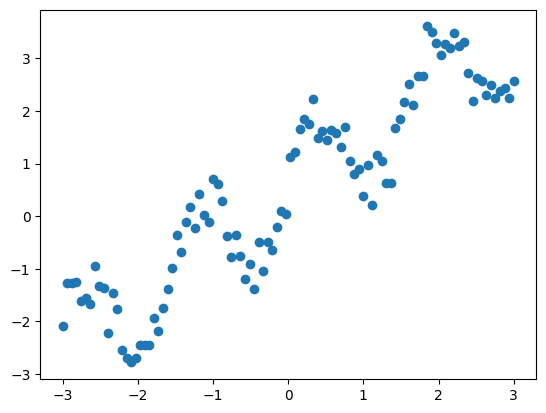

In [98]:
rng = np.random.RandomState(42)
y= np.sin(4*x)+x+rng.uniform(size=(len(x)))
plt.plot(x,y,'o')

In [99]:
print('Before: ', x.shape)
X = x[:, np.newaxis]
print('After: ', X.shape)

Before:  (100,)
After:  (100, 1)


In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [101]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [102]:
print(f"equation is y={regressor.coef_[0]:.2f}*x+{regressor.intercept_:0.2}")

equation is y=0.90*x+0.45


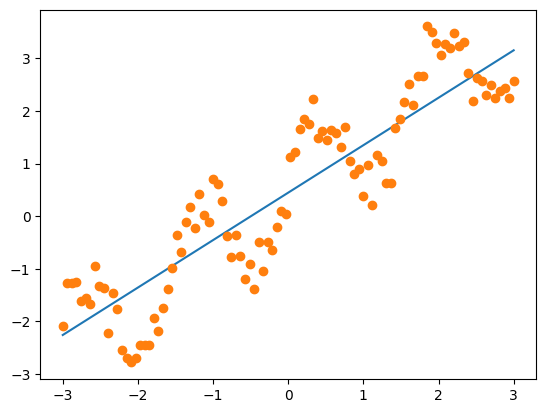

In [103]:
max_pt=regressor.coef_[0]*X.max()+regressor.intercept_
min_pt=regressor.coef_[0]*X.min()+regressor.intercept_
plt.plot([X.max(),X.min()], [max_pt, min_pt])
plt.plot(x,y,'o')

In [104]:
regressor.score(X_train, y_train)

0.8189190775347295

In [105]:
regressor.score(X_test, y_test)

0.7994321405079685

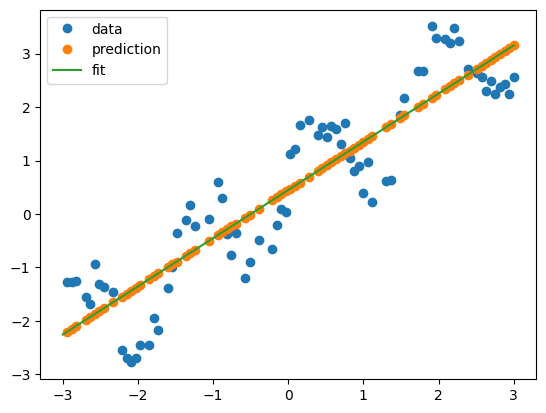

In [106]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, regressor.predict(X_train), 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

In [110]:
#add new feature
X_train_new=np.concatenate((X_train,np.sin(4*X_train)), axis=1)
X_test_new=np.concatenate((X_test,np.sin(4*X_test)), axis=1)
X_train_new.shape

(75, 2)

In [111]:
regressor_new=LinearRegression()
regressor_new.fit(X_train_new,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


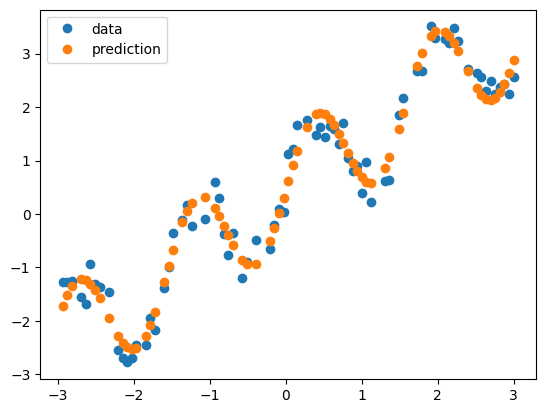

In [112]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, regressor_new.predict(X_train_new), 'o', label="prediction")
plt.legend(loc='best')